# Mushrooms images classification

## About Data
Copyright (c) 2023 Daniil Onishchenko  
(Licensed Open Data Commons Public Domain Dedication and License (PDDL) v1.0）  
[Mushrooms images classification 215 (kaggle) ](https://www.kaggle.com/datasets/daniilonishchenko/mushrooms-images-classification-215)

## About Code
This code aims to classify the mushrooms from images using Convolutional Neural Network.  
Also, In this code visualizes the images feature map using Grad-CAM.  

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import os
import cv2
import random
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array,array_to_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras import models

2023-06-08 19:44:19.009369: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
%matplotlib inline
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = False

In [4]:
zip_file_path = '../Input/archive.zip'
extract_folder = '../Input/mash_data'
class_list_path = 'mushrooms.txt'

## Loading image classification classes

In [20]:
zf = zipfile.ZipFile(zip_file_path, 'r')
fp= zf.open(class_list_path, 'r')
cls_data = fp.read()
_class_list = list(cls_data.decode('cp932').split('\r\n'))
class_list = [cls.replace('-', '_').replace('痴','s').replace('.','') for cls in _class_list]
print(class_list)
with open('test.txt', 'w') as f:
    for d in class_list:
        f.write("%s\n" % d)

['almond_mushroom', 'amanita_gemmata', 'amethyst_chanterelle', 'amethyst_deceiver', 'aniseed_funnel', 'ascot_hat', 'bay_bolete', 'bearded_milkcap', 'beechwood_sickener', 'beefsteak_fungus', 'birch_polypore', 'birch_woodwart', 'bitter_beech_bolete', 'bitter_bolete', 'black_bulgar', 'black_morel', 'blackening_brittlegill', 'blackening_polypore', 'blackening_waxcap', 'blue_roundhead', 'blushing_bracket', 'blushing_rosette', 'blushing_wood_mushroom', 'bovine_bolete', 'bronze_bolete', 'brown_birch_bolete', 'brown_rollrim', 'bruising_webcap', 'butter_cap', 'cauliflower_fungus', 'cedarwood_waxcap', 'chanterelle', 'charcoal_burner', 'chestnut_bolete', 'chicken_of_the_woods', 'cinnamon_bracket', 'clouded_agaric', 'clustered_domecap', 'common_bonnet', 'common_inkcap', 'common_morel', 'common_puffball', 'common_rustgill', 'crimped_gill', 'crimson_waxcap', 'cucumber_cap', 'curry_milkcap', 'deadly_fibrecap', 'deadly_webcap', 'deathcap', 'deer_shield', 'destroying_angel', 'devils_bolete', 'dog_stink

In [6]:
image_size = (224, 224)
images = []
labels = []

In [7]:
for class_name in class_list:
    class_path = os.path.join(extract_folder, 'data', 'data', class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = load_img(image_path, target_size=image_size)
        image = img_to_array(image)
        images.append(image)
        labels.append(class_list.index(class_name))

In [8]:
images = np.array(images)
labels = np.array(labels)

In [9]:
num_classes = len(class_list)
labels = tf.keras.utils.to_categorical(labels, num_classes)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=314)

## Visualization of training data

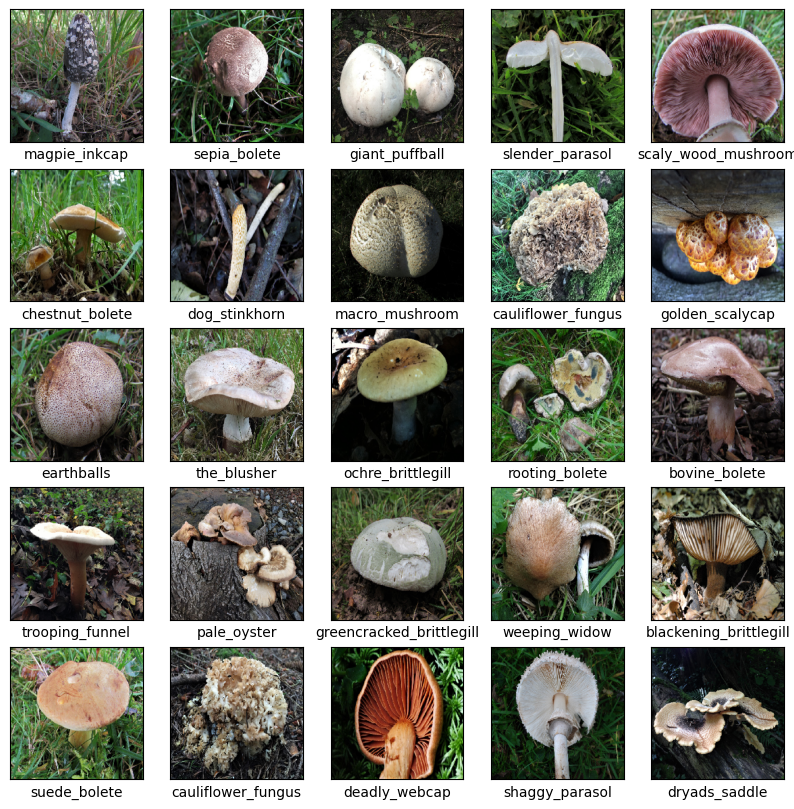

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(array_to_img(X_train[i], scale=True))
    plt.xlabel(class_list[np.argmax(y_train[i])])
plt.show()

## Training

In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in model.layers[:-4]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

2023-06-08 19:45:03.369369: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 19:45:03.405795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 19:45:03.405870: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 19:45:03.408064: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 19:45:03.408144: I tensorflow/compile

Epoch 1/20


2023-06-08 19:45:06.678293: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700
2023-06-08 19:45:07.416118: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.74GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-06-08 19:45:08.049134: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-06-08 19:45:08.049196: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

79/79 [==============================] - ETA: 0s - loss: 7.7938 - accuracy: 0.0100

2023-06-08 19:45:26.041030: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.74GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


79/79 [==============================] - 23s 216ms/step - loss: 7.7938 - accuracy: 0.0100 - val_loss: 6.3708 - val_accuracy: 0.0352
Epoch 2/20
79/79 [==============================] - 14s 176ms/step - loss: 5.0176 - accuracy: 0.0861 - val_loss: 5.3007 - val_accuracy: 0.0720
Epoch 3/20
79/79 [==============================] - 14s 177ms/step - loss: 3.6675 - accuracy: 0.2395 - val_loss: 4.6769 - val_accuracy: 0.1408
Epoch 4/20
79/79 [==============================] - 14s 178ms/step - loss: 2.6683 - accuracy: 0.4081 - val_loss: 4.2997 - val_accuracy: 0.1696
Epoch 5/20
79/79 [==============================] - 14s 178ms/step - loss: 1.9818 - accuracy: 0.5503 - val_loss: 4.0082 - val_accuracy: 0.2256
Epoch 6/20
79/79 [==============================] - 14s 177ms/step - loss: 1.4101 - accuracy: 0.7052 - val_loss: 3.8517 - val_accuracy: 0.2512
Epoch 7/20
79/79 [==============================] - 14s 178ms/step - loss: 1.0479 - accuracy: 0.7841 - val_loss: 3.6935 - val_accuracy: 0.2608
Epoch 8/20

## Test and evaluation results

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.440462589263916
Test accuracy: 0.35040000081062317


In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

tp = np.sum((y_pred_classes == 1) & (y_true == 1))
fp = np.sum((y_pred_classes == 1) & (y_true != 1))
fn = np.sum((y_pred_classes != 1) & (y_true == 1))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print('True Positives (TP):', tp)
print('False Positives (FP):', fp)
print('False Negatives (FN):', fn)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

20/20 [==============================] - 3s 138ms/step
True Positives (TP): 1
False Positives (FP): 5
False Negatives (FN): 1
Precision: 0.16666666666666666
Recall: 0.5
F1-score: 0.25


In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Visualization of regions of interest in the convolution layer by Grad-CAM

In [14]:
def grad_cam(input_model, x, layer_name):
    IMAGE_SIZE = (224,224)

    X = np.expand_dims(x, axis=0)
    preprocessed_input = X.astype('float32') / 255.0

    grad_model = models.Model([input_model.inputs], [input_model.get_layer(layer_name).output, input_model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(preprocessed_input)
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')

    guided_grads = gate_f * gate_r * grads

    weights = np.mean(guided_grads, axis=(0, 1))
    cam = np.dot(output, weights)

    cam = cv2.resize(cam, IMAGE_SIZE, cv2.INTER_LINEAR)
    cam  = np.maximum(cam, 0)
    heatmap = cam / cam.max()

    jet_cam = cv2.applyColorMap(np.uint8(255.0*heatmap), cv2.COLORMAP_JET)
    rgb_cam = cv2.cvtColor(jet_cam, cv2.COLOR_BGR2RGB)
    output_image = (np.float32(rgb_cam) + x / 2)

    return output_image

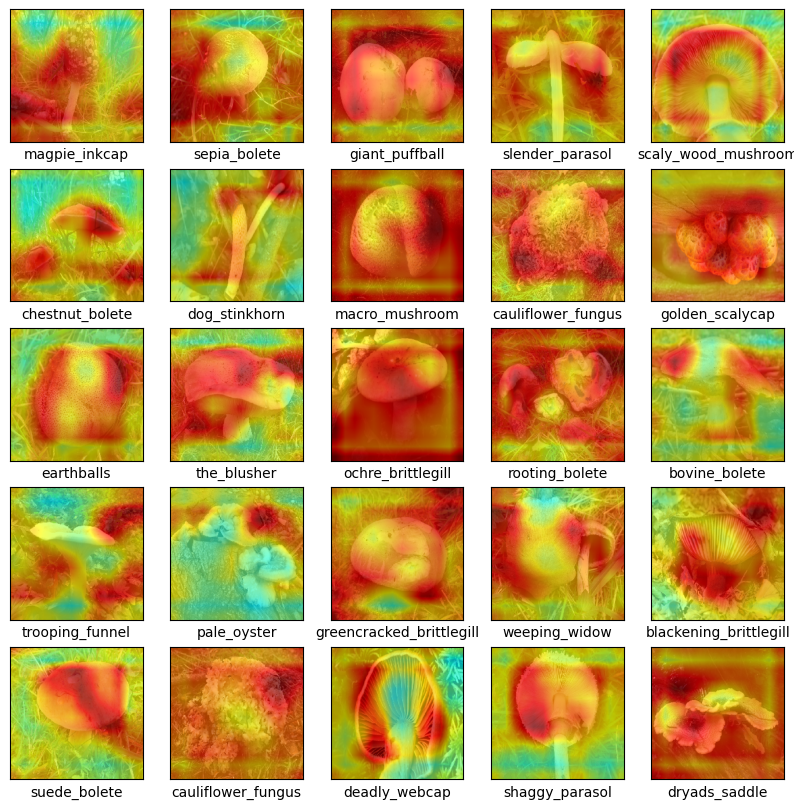

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    x = X_train[i]
    target_layer = 'block5_conv3'
    cam = grad_cam(model, x, target_layer)

    plt.imshow(array_to_img(cam))

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_list[np.argmax(y_train[i])])
plt.show()